## Experiments on Benchmark Data

In [96]:
library(FCPS)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(gridExtra)
library(plotly)

seeds <- 0:9
group.colors <- c("JS+" = "#e91010", "Naive" = "#000000", "RB" ="#1c97e3", "RB+" = "#1cbd47")

source("bbvi_multimix.R")

## EngyTime

We use the `EnyTime` benchmark dataset provided in the `FPCS` library. 

In [97]:
data(EngyTime)

set.seed(923)
subsamp <- sample(1:nrow(EngyTime$Data), size = 500)
engytime <- EngyTime$Data[subsamp, ]
rownames(engytime) <- NULL

head(engytime)

X1        X2      
[1,] -2.048352 1.349031
[2,]  0.203241 3.025790
[3,]  2.315944 3.923529
[4,]  2.080885 0.993722
[5,]  0.740648 4.125479
[6,]  1.107236 1.741204

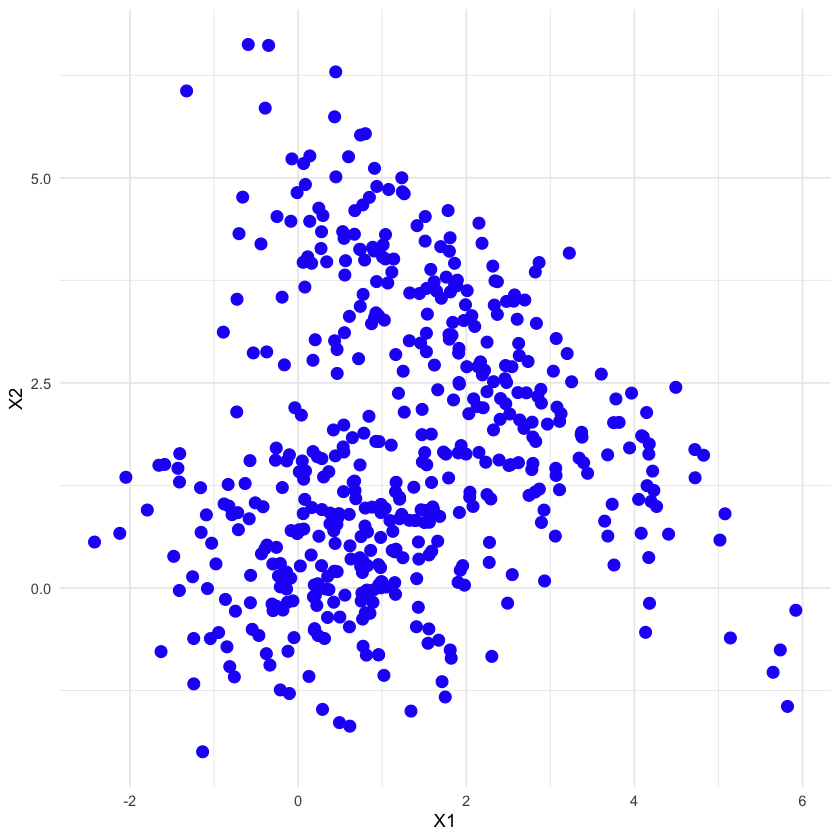

In [98]:
options(repr.plot.width = 7, repr.plot.height = 7)
data.frame(engytime) %>%
    ggplot(aes(x = X1, y = X2)) +
    geom_point(color = "#2500f7", size = 3) +
    theme_minimal()

In [70]:
engytime.priors <- list(
    m0 = c(2, 2),
    S0 = diag(4, 4, nrow = 2, ncol = 2),
    Sigma = diag(4, 4, nrow = 2, ncol = 2)
)

#engytime.rb <- bbvi_multimix(engytime, clusters = 2, mc_size = 100, min_iter = 100, max_iter = max_iter, priors = engytime.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = 0.01)
#engytime.js <- bbvi_multimix(engytime, clusters = 2, mc_size = 100, min_iter = 100, max_iter = max_iter, priors = engytime.priors, learn_rate = rate_rmsprop(0.01, 0.9), method = "JS+", verbose = TRUE, converge = 0.01)

engytime.summaries <- NULL
engytime.elbos <- NULL

for(i in seq_along(seeds)){
    engytime.rb.const <- bbvi_multimix(engytime, clusters = 2, mc_size = 200, min_iter = 100, max_iter = 500, priors = engytime.priors, learn_rate = rate_constant(0.001), method = "RB", verbose = TRUE, converge = 0.1, seed = seeds[i])
    engytime.rb.rmsp <- bbvi_multimix(engytime, clusters = 2, mc_size = 200, min_iter = 100, max_iter = 500, priors = engytime.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = 0.1, seed = seeds[i])
    engytime.js.const <- bbvi_multimix(engytime, clusters = 2, mc_size = 200, min_iter = 100, max_iter = 500, priors = engytime.priors, learn_rate = rate_constant(0.001), method = "JS+", verbose = TRUE, converge = 0.1, seed = seeds[i])
    engytime.js.rmsp <- bbvi_multimix(engytime, clusters = 2, mc_size = 200, min_iter = 100, max_iter = 500, priors = engytime.priors, learn_rate = rate_rmsprop(1, 0.9), method = "JS+", verbose = TRUE, converge = 0.1, seed = seeds[i])

    engytime.summaries <- bind_rows(
        engytime.summaries,
        summary_multimix(engytime.rb.const) %>% mutate(learning_rate = "Constant(0.001)"),
        summary_multimix(engytime.rb.rmsp) %>% mutate(learning_rate = "RMSProp(1, 0.9)"),
        summary_multimix(engytime.js.const) %>% mutate(learning_rate = "Constant(0.001)"),
        summary_multimix(engytime.js.rmsp) %>% mutate(learning_rate = "RMSProp(1, 0.9)")
    )

    engytime.elbos  <- bind_rows(
        engytime.elbos,
        engytime.rb.const$elbo %>% mutate(method = "RB", learning_rate = "Constant(0.001)"),
        engytime.rb.rmsp$elbo %>% mutate(method = "RB", learning_rate = "RMSProp(1, 0.9)"),
        engytime.js.const$elbo %>% mutate(method = "JS+", learning_rate = "Constant(0.001)"),
        engytime.js.rmsp$elbo %>% mutate(method = "JS+", learning_rate = "RMSProp(1, 0.9)")
    )
}

saveRDS(engytime.summaries, "Outputs/engytime_summaries.RDS")
saveRDS(engytime.elbos, "Outputs/engytime_elbos.RDS")

BBVI-RB: Iteration 2 | lambda: 0.0234 | ELBO: -2240.89 | ELBO Change: 1

BBVI-RB: Iteration 3 | lambda: 0.0147 | ELBO: -2166.18 | ELBO Change: 0

BBVI-RB: Iteration 4 | lambda: 0.0179 | ELBO: -2148.85 | ELBO Change: 0

BBVI-RB: Iteration 5 | lambda: 0.0135 | ELBO: -2117.65 | ELBO Change: 0

BBVI-RB: Iteration 6 | lambda: 0.0161 | ELBO: -2100.94 | ELBO Change: 0

BBVI-RB: Iteration 7 | lambda: 0.0249 | ELBO: -2089.84 | ELBO Change: 0

BBVI-RB: Iteration 8 | lambda: 0.0098 | ELBO: -2050.7 | ELBO Change: 0

BBVI-RB: Iteration 9 | lambda: 0.0163 | ELBO: -2077.73 | ELBO Change: 0

BBVI-RB: Iteration 10 | lambda: 0.024 | ELBO: -2045.76 | ELBO Change: 0

BBVI-RB: Iteration 11 | lambda: 0.0051 | ELBO: -2034.09 | ELBO Change: 0

BBVI-RB: Iteration 12 | lambda: 0.0155 | ELBO: -2044.28 | ELBO Change: 0

BBVI-RB: Iteration 13 | lambda: 0.0206 | ELBO: -2049.32 | ELBO Change: 0

BBVI-RB: Iteration 14 | lambda: 0.0145 | ELBO: -2023.3 | ELBO Change: 0

BBVI-RB: Iteration 15 | lambda: 0.0193 | ELBO: -2

In [101]:
engytime.summaries <- readRDS("Outputs/engytime_summaries.RDS")

engytime.summaries %>% 
    group_by(method, learning_rate) %>%
    summarise(iter_mn = mean(iterations), iter_2sd = 2 * sd(iterations), ELBO_mn = round(mean(ELBO),2), ELBO_2sd = round(2 * sd(ELBO),2), 
                elpd_mn = mean(elpd), elpd_2sd = 2 * sd(elpd), DIC_mn = round(mean(DIC),2), DIC_2sd = round(2 * sd(DIC),2))

`summarise()` has grouped output by 'method'. You can override using the
`.groups` argument.


method learning_rate   iter_mn iter_2sd ELBO_mn  ELBO_2sd elpd_mn   elpd_2sd 
1 JS+    Constant(0.001) 500.0   0.000000 -2233.87  38.16   -2153.662  57.70385
2 JS+    RMSProp(1, 0.9) 500.0   0.000000 -2565.99 552.75   -2371.058 542.04226
3 RB     Constant(0.001) 101.0   0.000000 -2371.06 436.19   -2797.019 867.89935
4 RB     RMSProp(1, 0.9) 101.9   2.573368 -2274.51 226.96   -2520.404 393.60149
  DIC_mn  DIC_2sd
1 4092.05   78.08
2 4736.45 1105.49
3 4737.86  871.27
4 4546.14  455.09

`summarise()` has grouped output by 'iter', 'method'. You can override using
the `.groups` argument.
Warning message:
"Removed 404 rows containing missing values (`geom_line()`)."


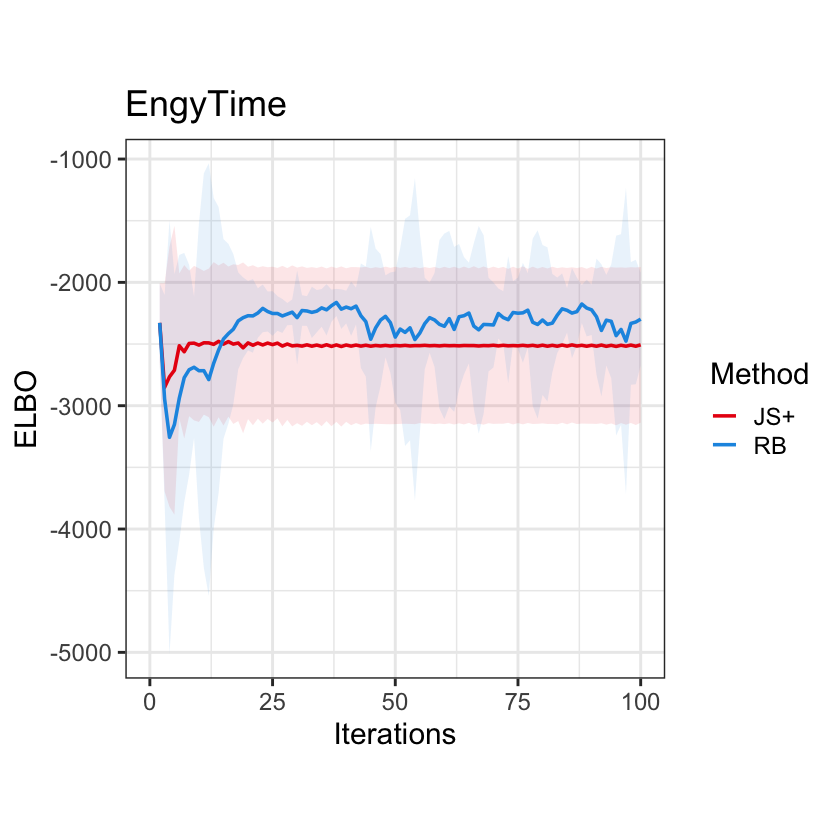

In [102]:
engytime.elbos <- readRDS("Outputs/engytime_elbos.RDS")

elbos <- engytime.elbos %>%
    group_by(iter, method, learning_rate) %>%
    summarise(mean = mean(elbo), sd = sd(elbo)) %>%
    filter(learning_rate %in% c("RMSProp(1, 0.9)"))

p1 <- elbos %>%
    ggplot(aes(iter, mean, fill = method)) +
    geom_ribbon(data = elbos, aes(ymin = mean - 2 * sd, ymax = mean + 2 * sd, group = method), alpha = 0.1) +
    geom_line(data = elbos, aes(color = method), linewidth = 1) + 
    scale_fill_manual(values = group.colors, guide = "none") +
    scale_color_manual(values = group.colors, name = "Method") +
    scale_x_continuous(limits = c(0,100)) +
    labs(title = "EngyTime", x = "Iterations", y = "ELBO") +
    theme_bw(base_size=18) +
    theme(aspect.ratio = 1)

p1

## Lsun3D

We use the `Lsun3D` benchmark dataset provided in the `FPCS` library. 

In [103]:
data(Lsun3D)

lsun3d <- Lsun3D$Data
head(lsun3d)

X        Y        C         
1 3.277701 0.814082 0.32657386
2 0.387577 0.176780 0.88804571
3 0.268546 0.582963 0.08098138
4 2.031145 0.244597 0.64392063
5 0.188677 0.461280 0.49663338
6 3.525472 0.265579 0.13821873

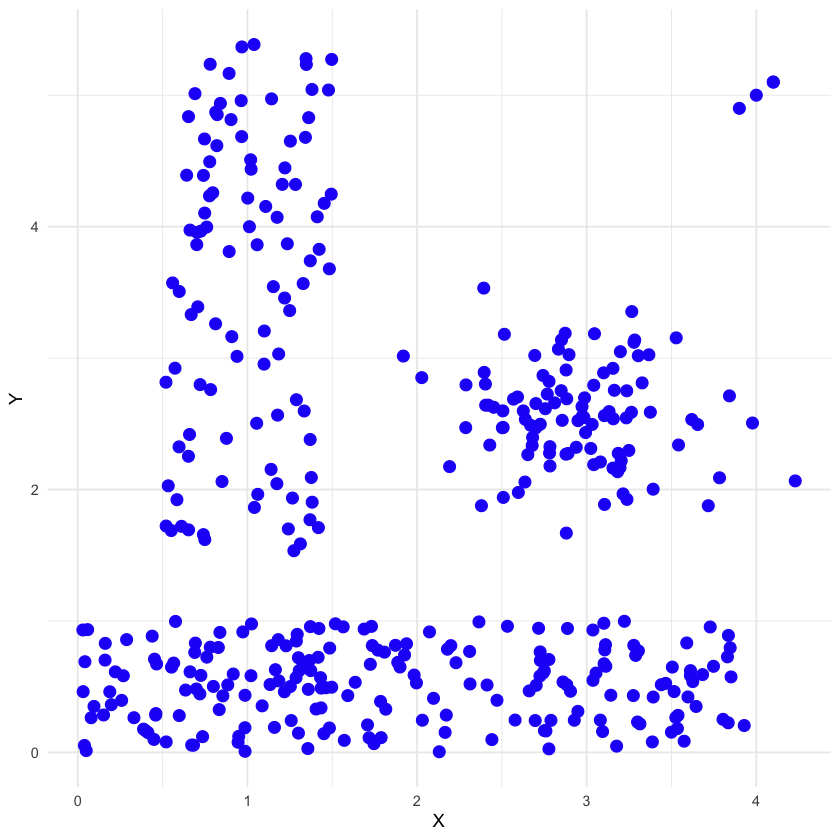

In [104]:
options(repr.plot.width = 7, repr.plot.height = 7)
data.frame(lsun3d) %>%
    ggplot(aes(x = X, y = Y)) +
    geom_point(color = "#2500f7", size = 3) +
    theme_minimal()

In [134]:
lsun3d.priors <- list(
    m0 = c(2, 2),
    S0 = diag(4, 4, nrow = 2, ncol = 2),
    Sigma = diag(4, 4, nrow = 2, ncol = 2)
)

# lsun3d.rb <- bbvi_multimix(lsun3d[,1:2], clusters = 4, mc_size = 100, min_iter = 100, max_iter = 500, priors = lsun3d.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = 0.1)
# lsun3d.js <- bbvi_multimix(lsun3d[,1:2], clusters = 4, mc_size = 100, min_iter = 100, max_iter = 500, priors = lsun3d.priors, learn_rate = rate_rmsprop(0.1, 0.9), method = "JS+", verbose = TRUE, converge = 0.1)

lsun3d.summaries <- NULL
lsun3d.elbos <- NULL

for(i in seq_along(seeds)){
    lsun3d.rb.const <- bbvi_multimix(lsun3d[,1:2], clusters = 4, mc_size = 200, min_iter = 100, max_iter = 500, priors = lsun3d.priors, learn_rate = rate_constant(0.001), method = "RB", verbose = TRUE, converge = 0.01, seed = seeds[i])
    lsun3d.rb.rmsp <- bbvi_multimix(lsun3d[,1:2], clusters = 4, mc_size = 200, min_iter = 100, max_iter = 500, priors = lsun3d.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = 0.01, seed = seeds[i])
    lsun3d.js.const <- bbvi_multimix(lsun3d[,1:2], clusters = 4, mc_size = 200, min_iter = 100, max_iter = 500, priors = lsun3d.priors, learn_rate = rate_constant(0.001), method = "JS+", verbose = TRUE, converge = 0.01, seed = seeds[i])
    lsun3d.js.rmsp <- bbvi_multimix(lsun3d[,1:2], clusters = 4, mc_size = 200, min_iter = 100, max_iter = 500, priors = lsun3d.priors, learn_rate = rate_rmsprop(1, 0.9), method = "JS+", verbose = TRUE, converge = 0.01, seed = seeds[i])

    lsun3d.summaries <- bind_rows(
        lsun3d.summaries,
        summary_multimix(lsun3d.rb.const) %>% mutate(learning_rate = "Constant(0.001)"),
        summary_multimix(lsun3d.rb.rmsp) %>% mutate(learning_rate = "RMSProp(1, 0.9)"),
        summary_multimix(lsun3d.js.const) %>% mutate(learning_rate = "Constant(0.001)"),
        summary_multimix(lsun3d.js.rmsp) %>% mutate(learning_rate = "RMSProp(1, 0.9)")
    )

    lsun3d.elbos  <- bind_rows(
        lsun3d.elbos,
        lsun3d.rb.const$elbo %>% mutate(method = "RB", learning_rate = "Constant(0.001)"),
        lsun3d.rb.rmsp$elbo %>% mutate(method = "RB", learning_rate = "RMSProp(1, 0.9)"),
        lsun3d.js.const$elbo %>% mutate(method = "JS+", learning_rate = "Constant(0.001)"),
        lsun3d.js.rmsp$elbo %>% mutate(method = "JS+", learning_rate = "RMSProp(1, 0.9)")
    )
}

saveRDS(lsun3d.summaries, "Outputs/lsun3d_summaries.RDS")
saveRDS(lsun3d.elbos, "Outputs/lsun3d_elbos.RDS")

BBVI-RB: Iteration 2 | lambda: 0.9275 | ELBO: -1805.28 | ELBO Change: 1

BBVI-RB: Iteration 3 | lambda: 0.6594 | ELBO: -2590.43 | ELBO Change: 0

BBVI-RB: Iteration 4 | lambda: 0.2297 | ELBO: -1876.44 | ELBO Change: 0

BBVI-RB: Iteration 5 | lambda: 0.2363 | ELBO: -1895.71 | ELBO Change: 0

BBVI-RB: Iteration 6 | lambda: 0.3316 | ELBO: -1910.94 | ELBO Change: 0

BBVI-RB: Iteration 7 | lambda: 0.3337 | ELBO: -1881.31 | ELBO Change: 0

BBVI-RB: Iteration 8 | lambda: 0.3415 | ELBO: -1849.48 | ELBO Change: 0

BBVI-RB: Iteration 9 | lambda: 0.3408 | ELBO: -1762.82 | ELBO Change: 0

BBVI-RB: Iteration 10 | lambda: 0.3868 | ELBO: -1826.79 | ELBO Change: 0

BBVI-RB: Iteration 11 | lambda: 0.2665 | ELBO: -1903.11 | ELBO Change: 0

BBVI-RB: Iteration 12 | lambda: 0.0853 | ELBO: -1926.78 | ELBO Change: 0

BBVI-RB: Iteration 13 | lambda: 0.1313 | ELBO: -1831.59 | ELBO Change: 0

BBVI-RB: Iteration 14 | lambda: 0.085 | ELBO: -1814.38 | ELBO Change: 0

BBVI-RB: Iteration 15 | lambda: 0.207 | ELBO: -

In [106]:
lsun3d.summaries <- readRDS("Outputs/lsun3d_summaries.RDS")

lsun3d.summaries %>% 
    group_by(method, learning_rate) %>%
    summarise(iter_mn = mean(iterations), iter_2sd = 2 * sd(iterations), ELBO_mn = round(mean(ELBO),2), ELBO_2sd = round(2 * sd(ELBO),2), 
                elpd_mn = mean(elpd), elpd_2sd = 2 * sd(elpd), DIC_mn = round(mean(DIC),2), DIC_2sd = round(2 * sd(DIC),2))

`summarise()` has grouped output by 'method'. You can override using the
`.groups` argument.


method learning_rate   iter_mn iter_2sd ELBO_mn  ELBO_2sd elpd_mn   elpd_2sd 
1 JS+    Constant(0.001) 101.0    0.00000 -1670.45  73.17   -1768.282  74.06199
2 JS+    RMSProp(1, 0.9) 101.0    0.00000 -1899.99 343.66   -1863.314 334.97872
3 RB     Constant(0.001) 101.0    0.00000 -1585.03  55.13   -1672.629 115.46374
4 RB     RMSProp(1, 0.9) 113.8   25.31227 -1719.89 103.91   -1911.117 186.78419
  DIC_mn  DIC_2sd
1 3324.04 144.29 
2 3718.67 672.92 
3 3153.50 111.53 
4 3434.30 210.13

`summarise()` has grouped output by 'iter', 'method'. You can override using
the `.groups` argument.
Warning message:
"Removed 40 rows containing missing values (`geom_line()`)."


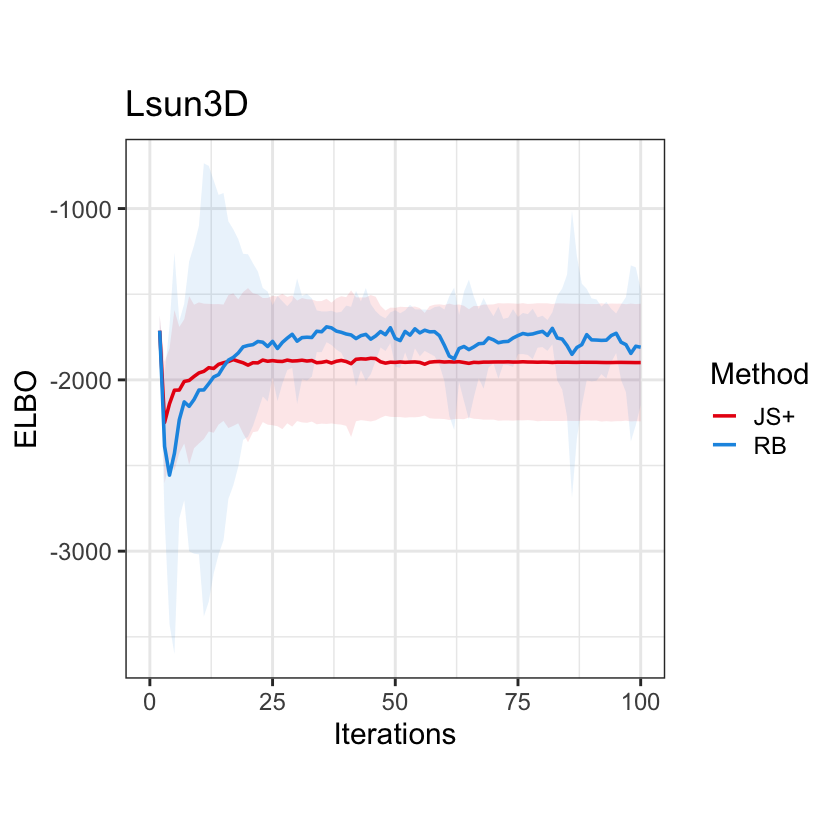

In [107]:
lsun3d.elbos <- readRDS("Outputs/lsun3d_elbos.RDS")

elbos <- lsun3d.elbos %>%
    group_by(iter, method, learning_rate) %>%
    summarise(mean = mean(elbo), sd = sd(elbo)) %>%
    filter(learning_rate %in% c("RMSProp(1, 0.9)"))

p2 <- elbos %>%
    ggplot(aes(iter, mean, fill = method)) +
    geom_ribbon(data = elbos, aes(ymin = mean - 2 * sd, ymax = mean + 2 * sd, group = method), alpha = 0.1) +
    geom_line(data = elbos, aes(color = method), linewidth = 1) + 
    scale_fill_manual(values = group.colors, guide = "none") +
    scale_color_manual(values = group.colors, name = "Method") +
    scale_x_continuous(limits = c(0,100)) +
    labs(title = "Lsun3D", x = "Iterations", y = "ELBO") +
    theme_bw(base_size=18) +
    theme(aspect.ratio = 1)

p2

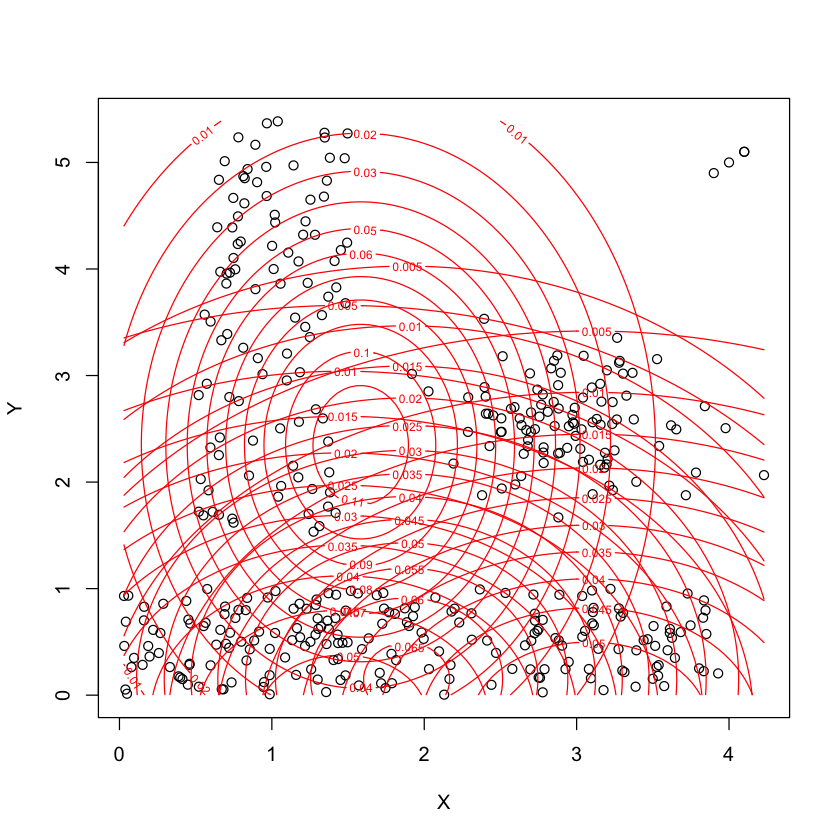

In [136]:
plot_multimix(lsun3d.rb)

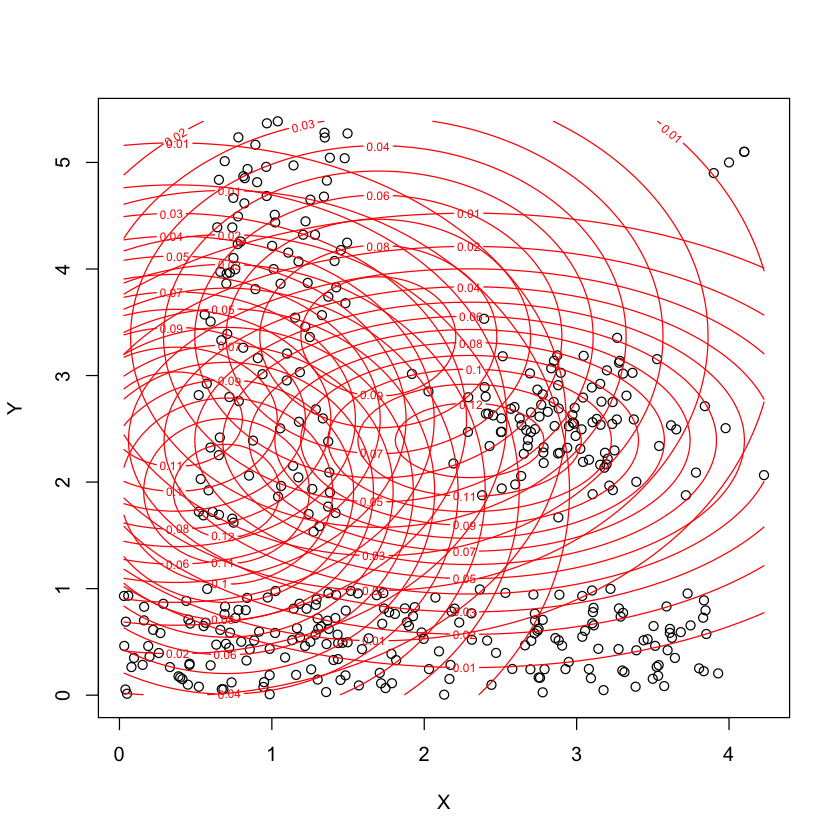

In [137]:
plot_multimix(lsun3d.js)

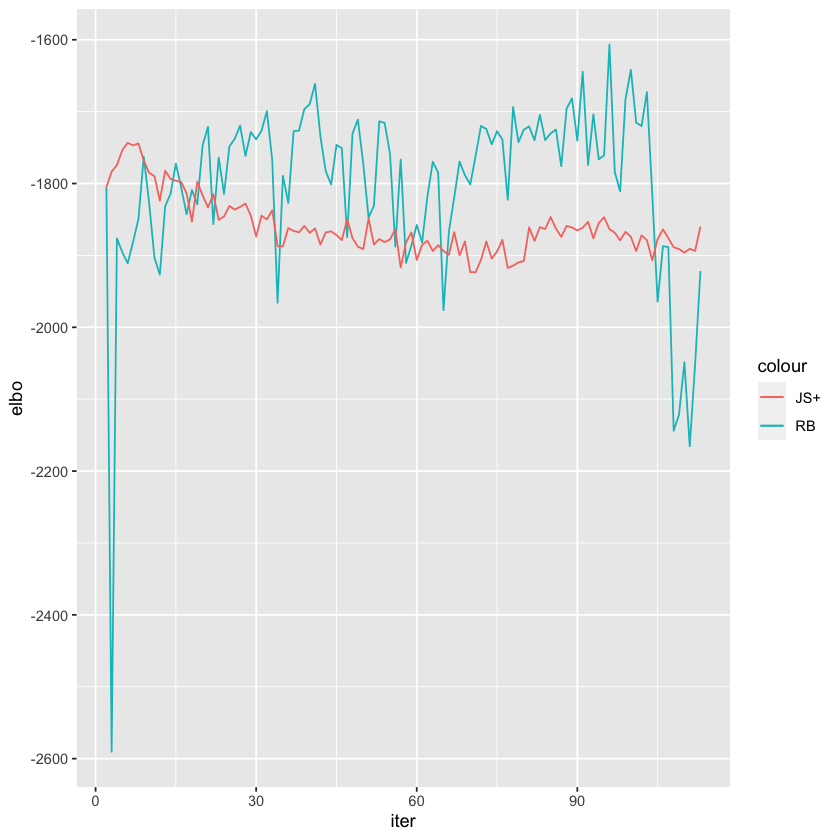

In [191]:
ggplot() +
    geom_line(data = lsun3d.rb$elbo, aes(x = iter, y = elbo, color = "RB")) + 
    geom_line(data = lsun3d.js$elbo, aes(x = iter, y = elbo, color = "JS+"))

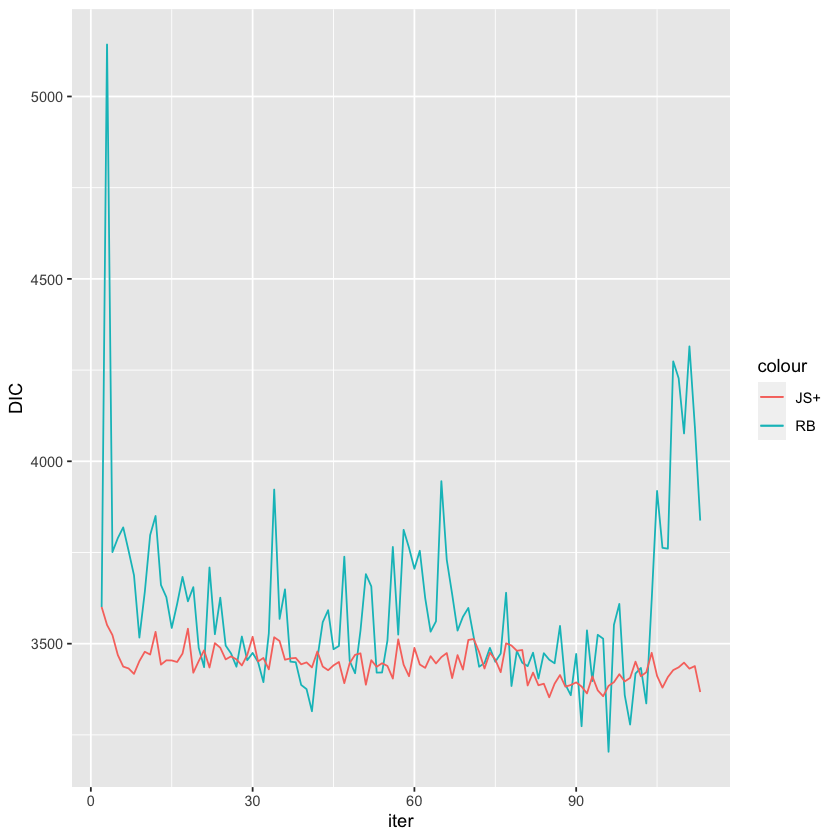

In [192]:
ggplot() +
    geom_line(data = lsun3d.rb$elbo, aes(x = iter, y = DIC, color = "RB")) + 
    geom_line(data = lsun3d.js$elbo, aes(x = iter, y = DIC, color = "JS+"))

## Tetra

In [224]:
fig <- plot_ly(data.frame(tetra), x = ~X1, y = ~X2, z = ~X3,
                marker = list(color = ~X2, colorscale = c('#9d8bff', '#2500f7'), showscale = FALSE))
fig <- fig %>% add_markers()

options(repr.plot.width = 8, repr.plot.height = 8)
fig

HTML widgets cannot be represented in plain text (need html)

In [108]:
data(Tetra)

tetra <- Tetra$Data
head(tetra)

X1       X2        X3       
1 1.295428  0.050829 -0.385217
2 1.409178 -0.035191 -0.251980
3 1.096803  0.246365 -0.415011
4 1.463328  0.265354 -0.513488
5 1.603284  0.080577 -0.470257
6 1.001833 -0.083266 -0.681399

In [86]:
tetra.priors <- list(
    m0 = c(0, 0, 0),
    S0 = diag(c(4, 4), nrow = 3, ncol = 3),
    Sigma = diag(c(1, 1, 1), nrow = 3, ncol = 3)
)

# tetra.rb <- bbvi_multimix(tetra, clusters = 4, mc_size = 100, min_iter = 100, max_iter = 500, priors = tetra.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = 0.1)
# tetra.js <- bbvi_multimix(tetra, clusters = 4, mc_size = 100, min_iter = 100, max_iter = 500, priors = tetra.priors, learn_rate = rate_rmsprop(0.1, 0.9), method = "JS+", verbose = TRUE, converge = 0.1)

tetra.summaries <- NULL
tetra.elbos <- NULL

for(i in seq_along(seeds)){
    tetra.rb.const <- bbvi_multimix(tetra, clusters = 4, mc_size = 200, min_iter = 100, max_iter = 500, priors = tetra.priors, learn_rate = rate_constant(0.001), method = "RB", verbose = TRUE, converge = 0.1, seed = seeds[i])
    tetra.rb.rmsp <- bbvi_multimix(tetra, clusters = 4, mc_size = 200, min_iter = 100, max_iter = 500, priors = tetra.priors, learn_rate = rate_rmsprop(1, 0.9), method = "RB", verbose = TRUE, converge = 0.1, seed = seeds[i])
    tetra.js.const <- bbvi_multimix(tetra, clusters = 4, mc_size = 200, min_iter = 100, max_iter = 500, priors = tetra.priors, learn_rate = rate_constant(0.001), method = "JS+", verbose = TRUE, converge = 0.1, seed = seeds[i])
    tetra.js.rmsp <- bbvi_multimix(tetra, clusters = 4, mc_size = 200, min_iter = 100, max_iter = 500, priors = tetra.priors, learn_rate = rate_rmsprop(1, 0.9), method = "JS+", verbose = TRUE, converge = 0.1, seed = seeds[i])

    tetra.summaries <- bind_rows(
        tetra.summaries,
        summary_multimix(tetra.rb.const) %>% mutate(learning_rate = "Constant(0.001)"),
        summary_multimix(tetra.rb.rmsp) %>% mutate(learning_rate = "RMSProp(1, 0.9)"),
        summary_multimix(tetra.js.const) %>% mutate(learning_rate = "Constant(0.001)"),
        summary_multimix(tetra.js.rmsp) %>% mutate(learning_rate = "RMSProp(1, 0.9)")
    )

    tetra.elbos  <- bind_rows(
        tetra.elbos,
        tetra.rb.const$elbo %>% mutate(method = "RB", learning_rate = "Constant(0.001)"),
        tetra.rb.rmsp$elbo %>% mutate(method = "RB", learning_rate = "RMSProp(1, 0.9)"),
        tetra.js.const$elbo %>% mutate(method = "JS+", learning_rate = "Constant(0.001)"),
        tetra.js.rmsp$elbo %>% mutate(method = "JS+", learning_rate = "RMSProp(1, 0.9)")
    )
}

saveRDS(tetra.summaries, "Outputs/tetra_summaries.RDS")
saveRDS(tetra.elbos, "Outputs/tetra_elbos.RDS")

BBVI-RB: Iteration 2 | lambda: 0.0438 | ELBO: -2683.79 | ELBO Change: 1

BBVI-RB: Iteration 3 | lambda: 0.039 | ELBO: -2521.43 | ELBO Change: 0

BBVI-RB: Iteration 4 | lambda: 0.0423 | ELBO: -2422.66 | ELBO Change: 0

BBVI-RB: Iteration 5 | lambda: 0.0318 | ELBO: -2285.41 | ELBO Change: 0

BBVI-RB: Iteration 6 | lambda: 0.045 | ELBO: -2257.26 | ELBO Change: 0

BBVI-RB: Iteration 7 | lambda: 0.0279 | ELBO: -2149.42 | ELBO Change: 0

BBVI-RB: Iteration 8 | lambda: 0.0283 | ELBO: -2097.81 | ELBO Change: 0

BBVI-RB: Iteration 9 | lambda: 0.0328 | ELBO: -2058.06 | ELBO Change: 0

BBVI-RB: Iteration 10 | lambda: 0.0324 | ELBO: -2049.29 | ELBO Change: 0

BBVI-RB: Iteration 11 | lambda: 0.0299 | ELBO: -1966.64 | ELBO Change: 0

BBVI-RB: Iteration 12 | lambda: 0.0345 | ELBO: -1928.32 | ELBO Change: 0

BBVI-RB: Iteration 13 | lambda: 0.0373 | ELBO: -1924 | ELBO Change: 0

BBVI-RB: Iteration 14 | lambda: 0.0418 | ELBO: -1901.01 | ELBO Change: 0

BBVI-RB: Iteration 15 | lambda: 0.0401 | ELBO: -184

In [111]:
tetra.summaries <- readRDS("Outputs/tetra_summaries.RDS")

tetra.summaries %>% 
    group_by(method, learning_rate) %>%
    summarise(iter_mn = mean(iterations), iter_2sd = 2 * sd(iterations), ELBO_mn = round(mean(ELBO),2), ELBO_2sd = round(2 * sd(ELBO),2), 
                elpd_mn = mean(elpd), elpd_2sd = 2 * sd(elpd), DIC_mn = round(mean(DIC),2), DIC_2sd = round(2 * sd(DIC),2))

`summarise()` has grouped output by 'method'. You can override using the
`.groups` argument.


method learning_rate   iter_mn iter_2sd    ELBO_mn  ELBO_2sd elpd_mn  
1 JS+    Constant(0.001) 101.0     0.0000000 -2361.84  227.07  -2839.512
2 JS+    RMSProp(1, 0.9) 101.0     0.0000000 -2775.48 1426.12  -2738.385
3 RB     Constant(0.001) 101.1     0.6324555 -2877.42  838.38  -4006.631
4 RB     RMSProp(1, 0.9) 199.7   225.8692837 -2775.27  475.97  -3832.616
  elpd_2sd  DIC_mn  DIC_2sd
1  294.2409 4695.19  447.87
2 1418.9379 5441.23 2848.83
3 1525.6642 5609.56 1525.07
4  827.8881 5544.28  953.34

`summarise()` has grouped output by 'iter', 'method'. You can override using
the `.groups` argument.
Warning message:
"Removed 353 rows containing missing values (`geom_line()`)."


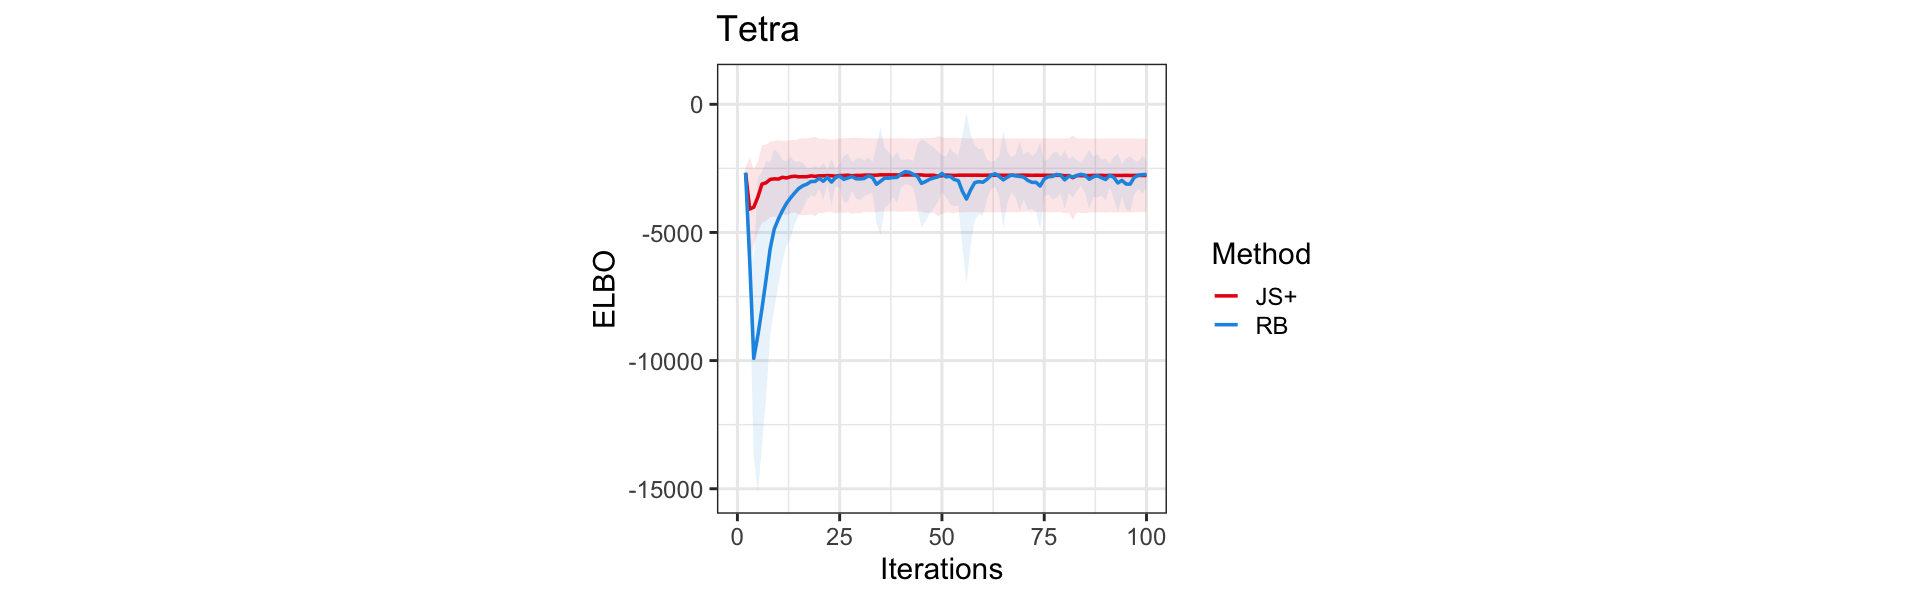

In [94]:
tetra.elbos <- readRDS("Outputs/tetra_elbos.RDS")

elbos <- tetra.elbos %>%
    group_by(iter, method, learning_rate) %>%
    summarise(mean = mean(elbo), sd = sd(elbo)) %>%
    filter(learning_rate %in% c("RMSProp(1, 0.9)"))

p3 <- elbos %>%
    ggplot(aes(iter, mean, fill = method)) +
    geom_ribbon(data = elbos, aes(ymin = mean - 2 * sd, ymax = mean + 2 * sd, group = method), alpha = 0.1) +
    geom_line(data = elbos, aes(color = method), linewidth = 1) + 
    scale_fill_manual(values = group.colors, guide = "none") +
    scale_color_manual(values = group.colors, name = "Method") +
    scale_x_continuous(limits = c(0,100)) +
    labs(title = "Tetra", x = "Iterations", y = "ELBO") +
    theme_bw(base_size=18) +
    theme(aspect.ratio = 1)

p3

Warning message:
"Removed 404 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 404 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 408 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 353 rows containing missing values (`geom_line()`)."


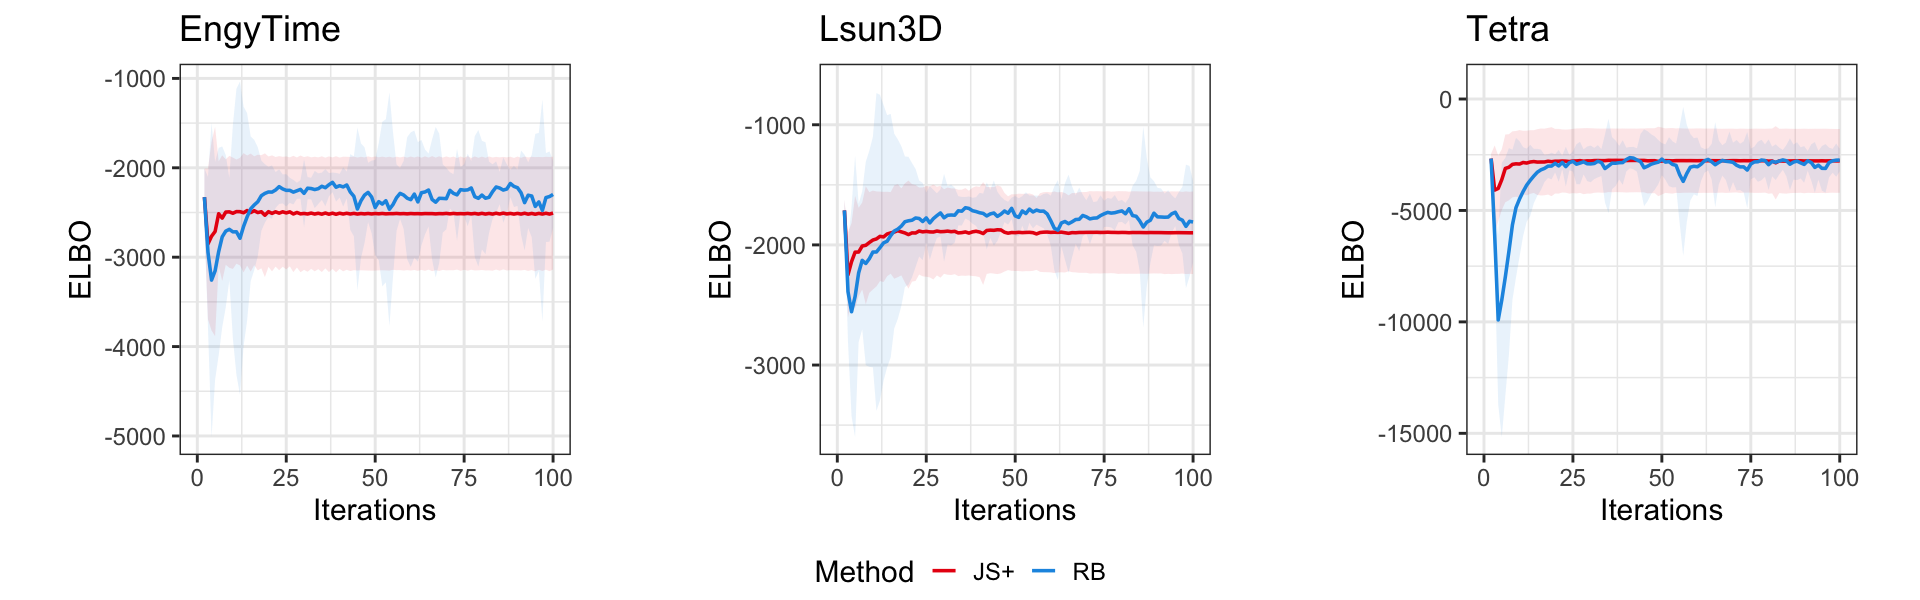

In [95]:
options(repr.plot.width = 16, repr.plot.height = 5)
ggarrange(p1, p2, p3, nrow = 1, common.legend = TRUE, legend = "bottom")